Sam Odle <br>
Sept 22, 2021  <br>
Project 1  <br>

In [231]:
import pandas as pd
pd.set_option("display.max_rows", None)

# Part 1: Dataset Download And Extraction
*The dataset consists of feature vectors belonging to 12,330 sessions.
The dataset was formed so that each session
would belong to a different user in a 1-year period to avoid
any tendency to a specific campaign, special day, user
profile, or period.*

##### Load csv correctly into a DataFrame and show contents in a cell

In [232]:
df = pd.read_csv('online_shoppers_intention_cs4364.csv')
print(df.head())

   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0             1.0                 0.000000   
1                     0.0             2.0                64.000000   
2                     0.0             1.0                 0.000000   
3                     0.0             2.0                 2.666667   
4                     0.0            10.0               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb   

##### Holdout dataset split as specified (use rows 10000 - 12331 as our holdout dataset)

In [233]:
df_holdout = df.iloc[10000:12331,]
df_train = df.drop(df.index[10000:12331])

print(f'Train Shape = {df_train.shape}')
print(f'Holdout Shape = {df_holdout.shape}')
print(f'Initial Shape = {df.shape}')

Train Shape = (10000, 18)
Holdout Shape = (2330, 18)
Initial Shape = (12330, 18)


##### Correct explanation generalization from such a holdout split

Only taking the final 2330 rows as the holdout dataset is problematic for generalization as the dataset appears to be in (roughly) chronological order. This particular holdout set only includes records from November and December.  Retail can be heavily impacted by season trends meaning the holdout set is not representative of the records from other months.

# Part 2: Data Cleaning
##### Use value_counts() in pandas to print out the distributions of the categorical and ordinal numbered features (treat SpecialDay as categorical here). Turn on the setting to reveal missing data -- how many features, and what percent of them, were missing? Discuss in markdown in your notebook.

In [234]:
print(df['Administrative'].value_counts(dropna=False, ascending=True))
print('\n')
print(df['Administrative_Duration'].value_counts(dropna=False, ascending=True, bins = 8))
print('\n')
print(df['Informational'].value_counts(dropna=False, ascending=False))
print('\n')
print(df['Informational_Duration'].value_counts(dropna=False, ascending=True, bins = 8))
print('\n')
print(df['ProductRelated'].value_counts(dropna=False))
print('\n')
print(df['ProductRelated_Duration'].value_counts(dropna=False, ascending=True, bins = 8))
print('\n')
print(df['BounceRates'].value_counts(dropna=False, ascending=True, bins = 8))
print('\n')
print(df['ExitRates'].value_counts(dropna=False, ascending=True, bins = 8))
print('\n')
print(df['PageValues'].value_counts(dropna=False, ascending=True, bins = 6))
print('\n')
print(df['SpecialDay'].value_counts(dropna=False, ascending=True))
print('\n')
print(df['OperatingSystems'].value_counts(dropna=False, ascending=True))
print('\n')
print(df['Browser'].value_counts(dropna=False, ascending=True))
print('\n')
print(df['Region'].value_counts(dropna=False, ascending=True))
print('\n')
print(df['TrafficType'].value_counts(dropna=False, ascending=True))
print('\n')
print(df['Month'].value_counts(dropna=False, ascending=True))
print('\n')
print(df['VisitorType'].value_counts(dropna=False, ascending=True))
print('\n')
print(df['Weekend'].value_counts(dropna=False, ascending=True))
print('\n')
print(df['Revenue'].value_counts(dropna=False, ascending=True))

26       1
27       1
20       2
21       2
23       3
22       4
24       4
19       6
18      12
17      16
16      24
15      38
14      44
13      56
12      86
11     105
10     153
9      225
8      287
7      338
6      432
5      575
4      765
3      915
2     1114
1     1354
0     5768
Name: Administrative, dtype: int64


(2973.906, 3398.75]         1
(2124.219, 2549.062]        3
(2549.062, 2973.906]        3
(1699.375, 2124.219]        8
(1274.531, 1699.375]       36
(849.688, 1274.531]        69
(424.844, 849.688]        321
(-3.4, 424.844]         11889
Name: Administrative_Duration, dtype: int64


0     9699
1     1041
2      728
3      380
4      222
5       99
6       78
7       36
9       15
8       14
10       7
12       5
14       2
16       1
11       1
24       1
13       1
Name: Informational, dtype: int64


(2230.703, 2549.375]        3
(1912.031, 2230.703]        4
(1593.359, 1912.031]       10
(1274.688, 1593.359]       16
(956.016, 1274.688]        34
(637.34

In [235]:
print(df.isna().sum())
missing = df['ProductRelated'].isna().sum()
net = df['ProductRelated'].shape[0]
pct = 100 * missing / net
print(f'Pct Missing from ProductRelated = {round(pct, 2)}%')

Administrative               0
Administrative_Duration      0
Informational                0
Informational_Duration       0
ProductRelated             335
ProductRelated_Duration      0
BounceRates                  0
ExitRates                    0
PageValues                   0
SpecialDay                   0
Month                        0
OperatingSystems             0
Browser                      0
Region                       0
TrafficType                  0
VisitorType                  0
Weekend                      0
Revenue                      0
dtype: int64
Pct Missing from ProductRelated = 2.72%


Only the feature *ProductRelated* has missing data.  2.7% of the values are missing.

##### Use the describe() method in pandas to print out summary statistics. Discuss which features you will have to consider more carefully, based on these results.

In [236]:
des = df.describe()
print(des)
print(' ')

# one indicator of 'a field to keep an eye on' is how many std devs separate the min from the max
for column in des:
    r = des[column]['max'] - des[column]['min']
    num_devs = r / des[column]['std']
    print(f'{des[column].name} - {round(num_devs, 2)}')

       Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.315166                80.818611       0.503569   
std          3.321784               176.779107       1.270156   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.500000       0.000000   
75%          4.000000                93.256250       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12330.000000    11995.000000             12330.000000   
mean                34.472398       32.122134              1194.746220   
std                140.749294       44.898778              1913.669288   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000        7.00000

Based on these results, there are a couple fields I will consider more carefully.  At first glance, the *_Duration* fields appear to have much higher means and much greater variation.  These may be candidates for scaling/normalization.
<br>
To get a better sense of the data I took a look at the number of standard deviations that comprise the range for each series.  This quick analysis showed that *PageValues*, *Informational*, and *ProductRelated* also have a bit of variation that may need to be dealt with.

##### Handle any missing data in your training data, but do not simply delete the rows. In your notebook, discuss why you chose to handle the missing data that way.

As discussed above, all missing values are in the field *ProductRelated*.  This field indicates the count of product pages viewed, and the time spent on those pages is in the field *ProductRelated_Duration*.  These fields are correlated, so the two approaches considered for this project are:
1. Delete *ProductRelated*.  Data would only be imputed from *ProductRelated_Duration*, so dropping this feature may not lose any needed data.
2. Impute *ProductRelated* based on *ProductRelated_Duration*.
<br>

For now, I will impute *ProductRelated*.  I may drop it later on in the project.

In [237]:
# Find the average *Product Related* based on *ProductRelated_Duration*

import statistics

def prod_ratio(r, r_duration):
    if pd.isna(r):
        return -1
    elif r == 0:
        return 0
    else:
        return r_duration / r

ratios_raw = [prod_ratio(x, y) for x, y in zip(df_train['ProductRelated'], df_train['ProductRelated_Duration'])]
ratios = [item for item in ratios_raw if item > 0]
duration_scale_factor = statistics.mean(ratios)
print(f' Avg ProductRelated per ProductRelated_Duration: {duration_scale_factor}')

 Avg ProductRelated per ProductRelated_Duration: 39.81747489668854


In [238]:
print('Before imputing missing values: ')
print(df_train.isna().sum())
print('\n')

def impute_product_related(r, r_duration):
    if pd.isna(r):
        return r_duration / duration_scale_factor
    else:
        return r

print(df_train['ProductRelated'])
df_train['ProductRelated'] = [impute_product_related(x, y) for x, y in zip(df_train['ProductRelated'], df_train['ProductRelated_Duration'])]
print(df_train['ProductRelated'])

print('\n')
print('After imputing missing values: ')
print(df_train.isna().sum())

Before imputing missing values: 
Administrative               0
Administrative_Duration      0
Informational                0
Informational_Duration       0
ProductRelated             302
ProductRelated_Duration      0
BounceRates                  0
ExitRates                    0
PageValues                   0
SpecialDay                   0
Month                        0
OperatingSystems             0
Browser                      0
Region                       0
TrafficType                  0
VisitorType                  0
Weekend                      0
Revenue                      0
dtype: int64


0         1.0
1         2.0
2         1.0
3         2.0
4        10.0
5        19.0
6         1.0
7         0.0
8         2.0
9         3.0
10        3.0
11       16.0
12        7.0
13        6.0
14        2.0
15       23.0
16        1.0
17       13.0
18        2.0
19       20.0
20        8.0
21        2.0
22        3.0
23        2.0
24        NaN
25        NaN
26        NaN
27        NaN
28

##### The holdout dataset also contains missing data. Discuss and implement how you recovered those items, without deleting those rows.
As you can see below, there are a few missing instances of the *ProductRelated* field.  I will handle these the same way that missing *ProductRelated* values were handled in the training dataset.


In [239]:
print('Before imputing missing values: ')
print(df_holdout.isna().sum())
print('\n')

def impute_product_related(r, r_duration):
    if pd.isna(r):
        return r_duration / duration_scale_factor
    else:
        return r

print(df_holdout['ProductRelated'])
df_holdout['ProductRelated'] = [impute_product_related(x, y) for x, y in zip(df_holdout['ProductRelated'], df_holdout['ProductRelated_Duration'])]
print(df_holdout['ProductRelated'])

print('\n')
print('After imputing missing values: ')
print(df_holdout.isna().sum())

Before imputing missing values: 
Administrative              0
Administrative_Duration     0
Informational               0
Informational_Duration      0
ProductRelated             33
ProductRelated_Duration     0
BounceRates                 0
ExitRates                   0
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64


10000     30.0
10001     80.0
10002     42.0
10003      6.0
10004     53.0
10005     10.0
10006      3.0
10007      4.0
10008     16.0
10009      1.0
10010     29.0
10011     23.0
10012      5.0
10013     30.0
10014     59.0
10015      6.0
10016     12.0
10017      3.0
10018     30.0
10019     12.0
10020      8.0
10021     36.0
10022     26.0
10023     37.0
10024     15.0
10025     25.0
10026     40.0
10027  

/var/folders/1x/4x80xl_91011ffsxqybphcj40000gn/T/ipykernel_8509/537371569.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_holdout['ProductRelated'] = [impute_product_related(x, y) for x, y in zip(df_holdout['ProductRelated'], df_holdout['ProductRelated_Duration'])]


##### Discuss (and implement if applicable) whether you need to scale/normalize your features, and which ones, if any.

I will not scale/normalize any features in preparation for Random Forest.  The primary reason is, [per the docs](https://python-data-science.readthedocs.io/en/latest/normalisation.html), tree based models are not dependent on scaling.  In other words, if this was a Neural Network, I'd probably want to scale the durations and visits to not unintentionally overweight durations vs number of page visits.  If we were going to normalize/scale, the other candidate feature would be *PageValues*.
<br>
Given that prior to testing the Random Forest model I don't know that it is necessary, I will not deal with the potentially unnecessary steps.

##### There are several categorical features. Discuss and implement if you will encode them as ordinal numbers, or one-hot encode them, and why you chose to do so for each such feature.

From the [documentation](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset), the categorical features are: *Month*, *OperatingSystems*, *Browser*, *Region*, *TrafficType*, *VisitorType*, *Weekend*, and *Revenue*.
<br>
I will one-hot encode *OperatingSystems*, *Browser*, *Region*, and *TrafficType* to prevent the model from coming up with a rule such as 'any operating system <3', because there is to my knowledge no order to any of these values.  Following this logic, *VisitorType* could be one hot encoded however as there are only two possible values I will leave as-is.  The downside to this is there will be an explosion of features.  If this were not school I would leave these as is for the first cut but I'm looking forward to experimenting a bit here and want to show I know how to do this.
<br>
*Weekend*, and *Revenue* are already boolean fields and are fine as is.  *Month* makes sense to leave as-is as it is relatively high cardinality and there is an order intrinsic to the months.

In [240]:
# modified from source: https://stackoverflow.com/a/52935270/5732261
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[feature_to_encode])
    dummies = dummies.add_prefix(feature_to_encode + '_')
    print(dummies.head())
    print('\n')
    res = pd.concat([original_dataframe, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1)
    return(res)

features_to_encode = ['OperatingSystems', 'Browser', 'Region', 'TrafficType']
for feature in features_to_encode:
    df_train = encode_and_bind(df_train, feature)
    df_holdout = encode_and_bind(df_holdout, feature)

print(df_train.head())
print(df_holdout.head())


   OperatingSystems_1  OperatingSystems_2  OperatingSystems_3  \
0                   1                   0                   0   
1                   0                   1                   0   
2                   0                   0                   0   
3                   0                   0                   1   
4                   0                   0                   1   

   OperatingSystems_4  OperatingSystems_5  OperatingSystems_6  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   1                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   OperatingSystems_7  OperatingSystems_8  
0                   0                   0  
1                   0                   0  
2                   0                   0  
3                   0                   0 

##### You don't need to implement this, but in the dataset, were there any ordinal features that the authors should have recorded as categorical, in your opinion? Why or why not? Discuss in a markdown cell.

The authors [state that](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset) *Month*, *OperatingSystems*, *Browser*, *Region*, *TrafficType*, *VisitorType*, *Weekend*, and *Revenue* are categorical,however *OperatingSystems*, *Browser*, *Region*, and *TrafficType* are recorded in an ordinal manner.  I would recommend recording the text values of these fields in order to enable better feature engineering.  Without accessing the paper, the meanings of these numbers are not readily available.
<br> <br>
*SpecialDay* is less clear as the exact methodology for the calculation is not explicitly stated.  If it is the continuous output of a calculation, it is recorded appropriately.  Based on the values, it seems as though they are using numbers to bucket different time frames (e.g. there are no odd digits in any of the values).  If this is the case, is it also likely fine as-is.
<br> <br>
*Administrative*, *Administrative_Duration*, *Informational*, *Informational_Duration*, *ProductRelated*, *ProductRelated_Duration*, *BounceRates*, *ExitRates*, and *PageValues* are all recorded appropriately.


# Part 3: Feature Simplification And Engineering
##### Use a heatmap to show the correlation between all feature pairs. Discuss, if any, which features you would recommend dropping from your model. Also discuss why you would want to drop them (what is the expected benefit?)	5 points

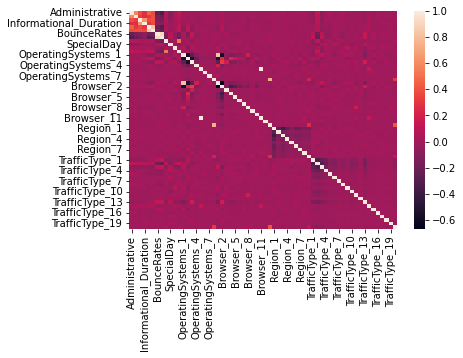

In [241]:
import seaborn
import numpy as np
# heatmap showing all one hot encoded features
ax = seaborn.heatmap(df_train.corr())



<AxesSubplot:>

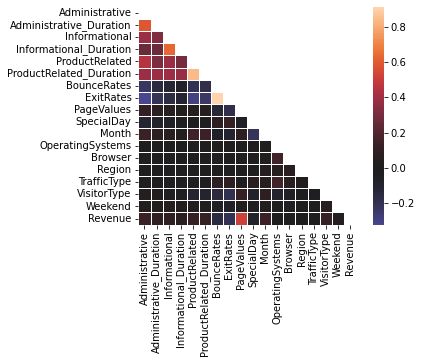

In [242]:
# cleaned up the data to make everything numeric, show heatmap w/ original fields
df = df.replace('Returning_Visitor',1)
df = df.replace('New_Visitor',2)
df = df.replace('Other',0)

df = df.replace('Jan',1, regex=True)
df = df.replace('Feb',2, regex=True)
df = df.replace('Mar',3, regex=True)
df = df.replace('Apr',4, regex=True)
df = df.replace('May',5, regex=True)
df = df.replace('Jun',6, regex=True)
df = df.replace('Jul',7, regex=True)
df = df.replace('Aug',8, regex=True)
df = df.replace('Sep',9, regex=True)
df = df.replace('Oct',10, regex=True)
df = df.replace('Nov',11, regex=True)
df = df.replace('Dec',12, regex=True)

df['Month'] = pd.to_numeric(df['Month'])
df['VisitorType'] = pd.to_numeric(df['VisitorType'])

df_train = df.drop(df.index[10000:12331])

corr = df_train.corr()
# print(df.dtypes)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Draw the heatmap with the mask
seaborn.heatmap(corr, mask=mask, center=0,
            square=True, linewidths=.5)

<AxesSubplot:>

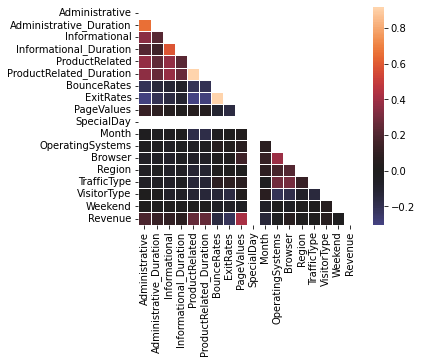

In [243]:
# For the holdout:
df_holdout = df.iloc[10000:12331,]

corr2 = df_holdout.corr()

# Generate a mask for the upper triangle
mask2 = np.triu(np.ones_like(corr2, dtype=bool))

# Draw the heatmap with the mask
seaborn.heatmap(corr2, mask=mask2, center=0,
            square=True, linewidths=.5)

There is a strong correlation between the page visits and the duration of the visits.  Prima facia the correlation makes sense as more visits would necessarily equal longer net visit durations.  I believe this also means the visit counts can be dropped from the dataset.  This correlation combined with our earlier missing data makes these prime candidates for removal.  Removal will expedite our analysis, ideally without losing any valuable information and will reduce the complexity of our tree.
<br> *BounceRate* and *ExitRate* are also tightly correlated, and are slightly negatively correlated with Revenue. I may drop them later to improve performance but will leave them for now.
<br> Finally, several fields have no correlation with *Revenue* and are stronger candidates for dropping in order to remove unnecesarry fields that may reduce accuracy.  Fields will be dropped below.

##### Given what you know about the limitations of RandomForests, engineer one additional feature, and discuss why you think it might help the model.

Random Forest will perform better (accuracy and execution speed) with fewer, more important/relevant features.  Once field that we can engineer to help the model would be to calculate the average time spend per page (calculated across all page types).  This could effectively consolidate six fields into one.

In [244]:
def get_avg_duration(r1, r_duration1, r2, r_duration2, r3, r_duration3):
    visits = r1 + r2 + r3
    net_duration = r_duration1 + r_duration2 + r_duration3
    if visits > 0:
        return net_duration / visits
    else:
        return 0

df['AvgDuration'] = [get_avg_duration(x1, y1, x2, y2, x3, y3) for x1, y1, x2, y2, x3, y3 in zip(df['Administrative'], df['Administrative_Duration'], df['ProductRelated'], df['ProductRelated_Duration'], df['Informational'], df['Informational_Duration'])]
# print(df['AvgDuration'].head())

# drop the fields
df = df.drop('Administrative', 1)
df = df.drop('ProductRelated', 1)
df = df.drop('Informational', 1)

/var/folders/1x/4x80xl_91011ffsxqybphcj40000gn/T/ipykernel_8509/2832422788.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('Administrative', 1)
/var/folders/1x/4x80xl_91011ffsxqybphcj40000gn/T/ipykernel_8509/2832422788.py:14: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('ProductRelated', 1)
/var/folders/1x/4x80xl_91011ffsxqybphcj40000gn/T/ipykernel_8509/2832422788.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('Informational', 1)


# Part 4: Model Training

##### Separate your training data into features and labels (X and y).

In [245]:
from sklearn.model_selection import train_test_split

# Labels are the values we want to predict
labels = np.array(df['Revenue'])

# Remove the labels from the features
features= df.drop('Revenue', axis = 1)

# Split the data into training and testing sets
X_features, y_features, X_labels, y_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

print('Training Features Shape:', X_features.shape)
print('Training Labels Shape:', X_labels.shape)
print('Testing Features Shape:', y_features.shape)
print('Testing Labels Shape:', y_labels.shape)

Training Features Shape: (9247, 15)
Training Labels Shape: (9247,)
Testing Features Shape: (3083, 15)
Testing Labels Shape: (3083,)


##### The labels for this dataset are highly imbalanced. Discuss and implement how you will handle this situation for this analysis.

The dataset has many more 'False' *Revenue* labels, causing imbalance.  The cross validation we are performing later will help account for this imbalance.
<br> Immediately, I will set the *class_weights* field to 'balanced'.  [Per the sklearn docs](https://scikit-learn.org/stable/modules/generated/sklearn.utils.class_weight.compute_class_weight.html) will adjust the penalties accounting for the scarcity of our True label by: "If ‘balanced’, class weights will be given by n_samples / (n_classes * np.bincount(y))".  Undersampling is another technique that can be used to address an imbalance.  I will set the *bootstrap* field to True to not use the entire dataset to train the model.

##### Instantiate a RandomForest model of your choosing.

In [246]:
from sklearn.ensemble import RandomForestClassifier

# Create the model with 100 trees
model = RandomForestClassifier(n_estimators=100, bootstrap = True, class_weight='balanced', max_features = 'auto')
# Fit on training data
model.fit(X_features, X_labels)


RandomForestClassifier(class_weight='balanced')

##### Define a grid to tune at least three different hyperparameters with at least two different values each. Discuss why you think these parameter values might be useful for this dataset.

##### Set up a gridsearchCV with 5-fold cross validation. Discuss what accuracy metric you chose and why.

##### Train your model using gridsearchCV, and report the best performing hyperparameters.

# Part 5: Model Analysis

##### Calculate accuracy, precision and recall on the holdout dataset. Discuss which metric you think is most meaningful for this dataset, and why

##### Discuss how the model performance on holdout compares to the model performance during training. Do you think your model will generalize well? Why or why not?

##### Generate a confusion matrix and discuss your results.

##### Print out the feature importances of your model.

# Part 6: Model Comparison

##### Train and tune another decision-tree based model on your training dataset. Using the best performing hyperparameters, test this model on your holdout. How did it perform, compared to your earlier model? Do you think your results will generalize?

##### Next, repeat training and tuning on the same data with a LogisticRegression model. Do you need to do any additional feature cleaning or scaling here? Why or why not?

# Extra Credit